In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

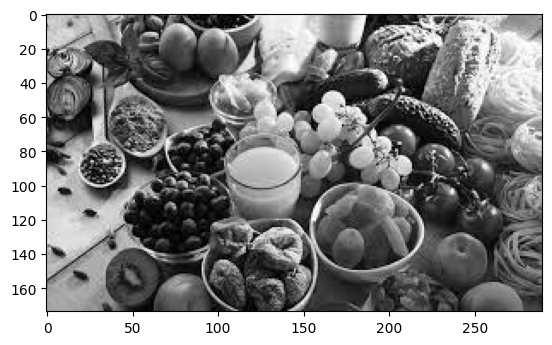

In [2]:
# Read image
img = cv2.imread('/content/img.jpg',0)
img01 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img01)


In [3]:
# definig kernels
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
sharpening_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
box_blur_kernel = np.ones((3, 3)) / 9
gaussian_blur_kernel = cv2.getGaussianKernel(5, 1)

In [4]:
# applying filter2d
dst_identity_kernel = cv2.filter2D(img.copy(), -1, identity_kernel)
dst_edge_detection_kernel = cv2.filter2D(img.copy(), -1, edge_detection_kernel)
dst_sharpening_kernel = cv2.filter2D(img.copy(), -1, sharpening_kernel)
dst_box_blur_kernel = cv2.filter2D(img.copy(), -1, box_blur_kernel)
dst_gaussian_blur_kernel = cv2.filter2D(img.copy(), -1, gaussian_blur_kernel)


In [5]:
# Apply sharpening for consistency
dst_sharpened = cv2.filter2D(img.copy(), -1, sharpening_kernel)


In [6]:
# applyting convolve
dst_reflect_convolve = ndimage.convolve(dst_sharpened.copy(), sharpening_kernel, mode='reflect')
dst_constant_convolve = ndimage.convolve(dst_sharpened.copy(), sharpening_kernel, mode='constant', cval=1.0)
dst_nearest_convolve = ndimage.convolve(dst_sharpened.copy(), sharpening_kernel, mode='nearest')
dst_mirror_convolve = ndimage.convolve(dst_sharpened.copy(), sharpening_kernel, mode='mirror')
dst_wrap_convolve = ndimage.convolve(dst_sharpened.copy(), sharpening_kernel, mode='wrap')


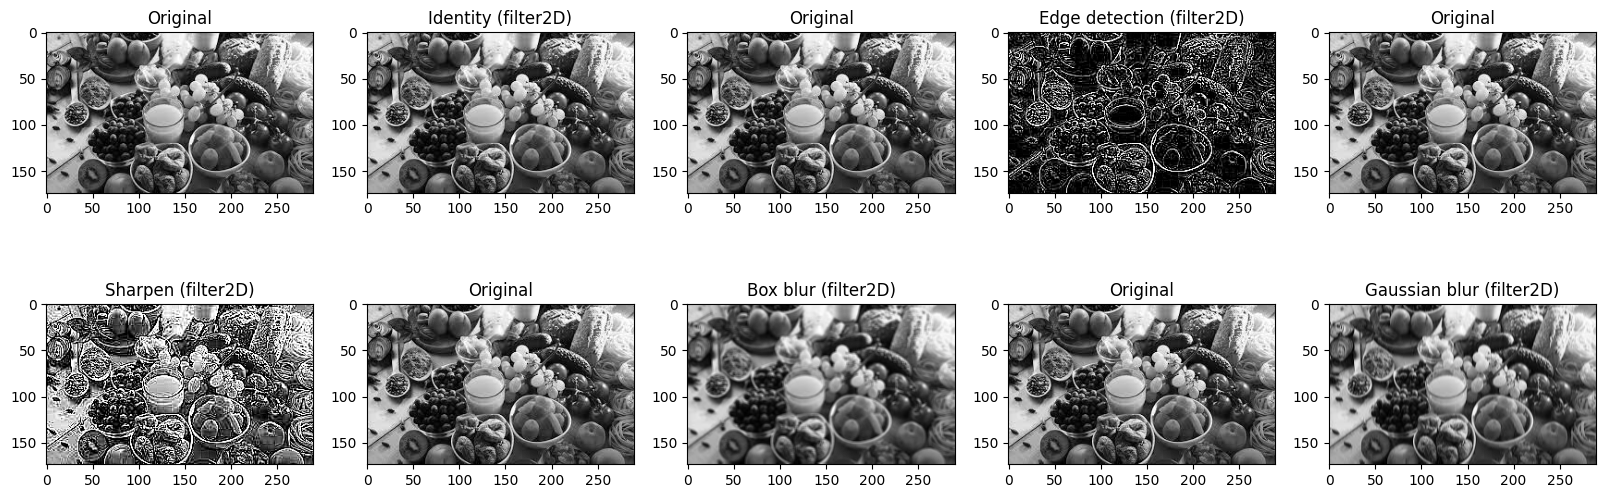

In [7]:
# Visualize results for filter2d
plt.figure(figsize=(20, 10))

# Identity kernel
plt.subplot(3, 5, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(3, 5, 2), plt.imshow(dst_identity_kernel, cmap='gray'), plt.title('Identity (filter2D)')

# Edge detection kernel
plt.subplot(3, 5, 3), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(3, 5, 4), plt.imshow(dst_edge_detection_kernel, cmap='gray'), plt.title('Edge detection (filter2D)')

# Sharpening kernel
plt.subplot(3, 5, 5), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(3, 5, 6), plt.imshow(dst_sharpening_kernel, cmap='gray'), plt.title('Sharpen (filter2D)')

# Box blur kernel
plt.subplot(3, 5, 7), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(3, 5, 8), plt.imshow(dst_box_blur_kernel, cmap='gray'), plt.title('Box blur (filter2D)')

# Gaussian blur kernel
plt.subplot(3, 5, 9), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(3, 5, 10), plt.imshow(dst_gaussian_blur_kernel, cmap='gray'), plt.title('Gaussian blur (filter2D)')


plt.show()

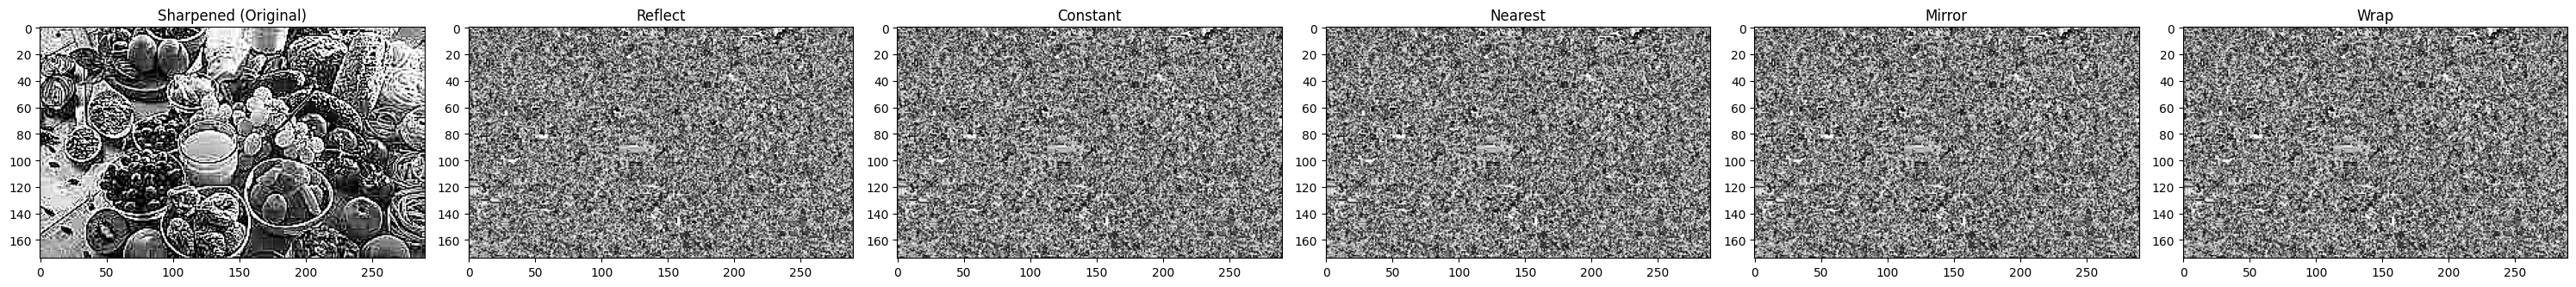

In [8]:
# Visualize results
plt.figure(figsize=(30, 12))

plt.subplot(1, 6, 1), plt.imshow(dst_sharpened, cmap='gray'), plt.title('Sharpened (Original)')
plt.subplot(1, 6, 2), plt.imshow(dst_reflect_convolve, cmap='gray'), plt.title('Reflect')
plt.subplot(1, 6, 3), plt.imshow(dst_constant_convolve, cmap='gray'), plt.title('Constant')
plt.subplot(1, 6, 4), plt.imshow(dst_nearest_convolve, cmap='gray'), plt.title('Nearest')
plt.subplot(1, 6, 5), plt.imshow(dst_mirror_convolve, cmap='gray'), plt.title('Mirror')
plt.subplot(1, 6, 6), plt.imshow(dst_wrap_convolve, cmap='gray'), plt.title('Wrap')

plt.tight_layout()
plt.show()